In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

import importlib

import dgsp
import graph_examples as dgsp_toys
import plotting as dgsp_plot

(<Figure size 2000x800 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

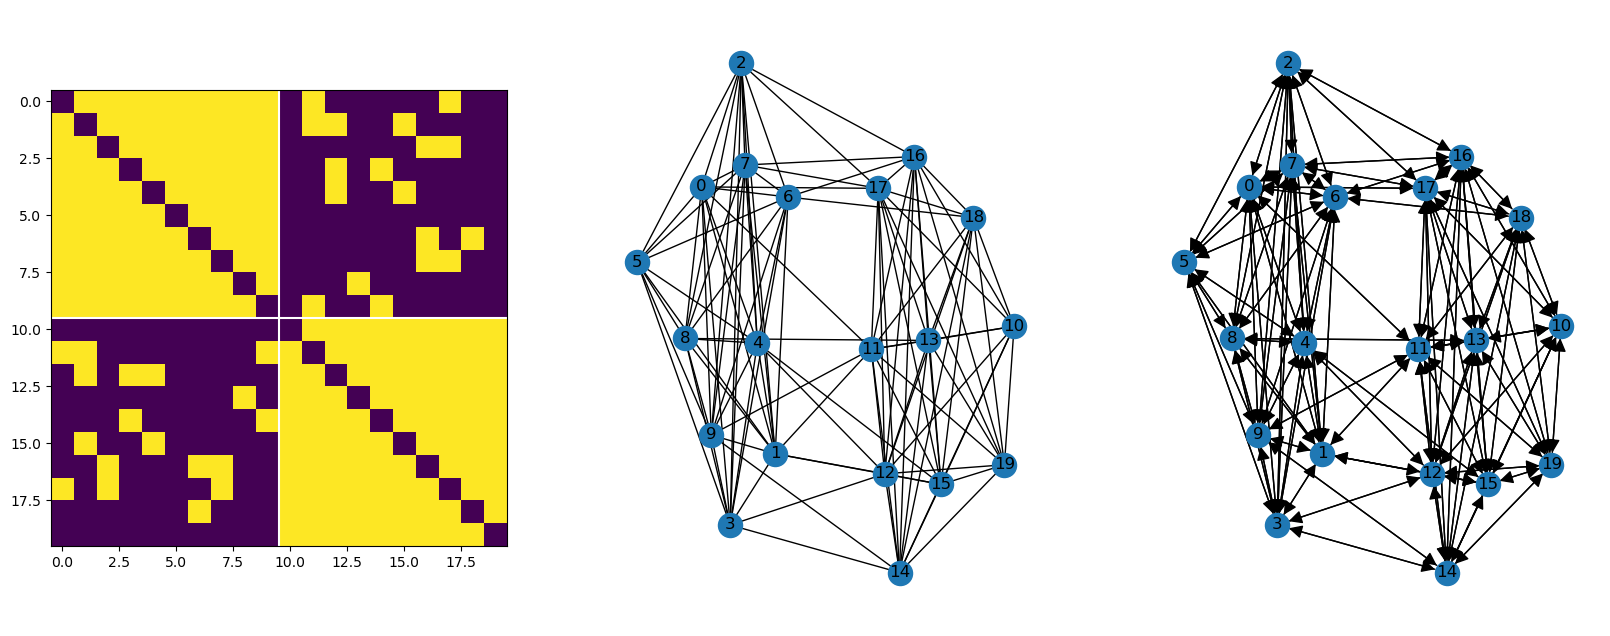

In [2]:
n_nodes = 20

myseed = 140857
myseed += 220367
rand = dgsp_toys.toy_random_seeded(n_nodes, edge_prob=1, con_prob=.18, out_prob=1, seed=myseed)

dgsp_plot.plot_graph(rand, position="spring")
#dgsp.SVD_summary(rand)

## Relationship between $s_i$, $q_Q(u_i)$ and $v_i^Tu_i$

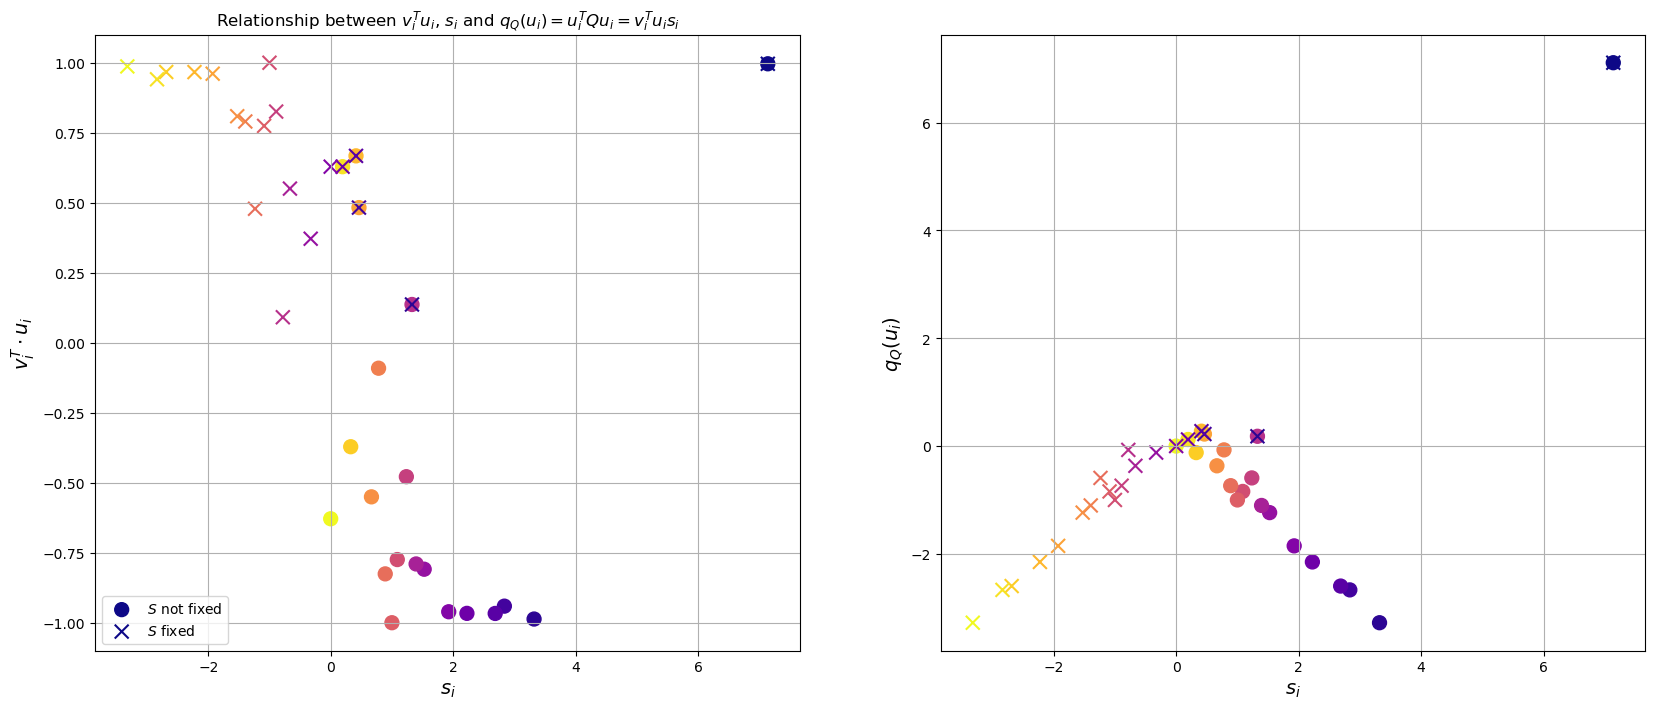

In [3]:
importlib.reload(dgsp)

myrandir, dir_id = dgsp.make_directed(rand, 4, seed=140857)

mod_mat = dgsp.modularity_matrix(myrandir)

#fig, axes = plt.subplots(ncols=2, figsize=(16, 8), sharex=True, sharey=True)
fig, ax = plt.subplots(ncols=2, figsize=(20, 8), sharex=True)

ax[0].set_title("Relationship between $v_i^Tu_i$, $s_i$ and $q_Q(u_i)=u_i^TQu_i=v_i^Tu_i s_i$")

for fix_negative, marker in zip([False, True], ["o", "x"]):
#for fix_negative, marker in zip([False], ["o", "x"]):
    U, S, Vh = dgsp.sorted_SVD(mod_mat, fix_negative=fix_negative)

    #dgsp.singular_against_modality(myrandir, fix_negative=True)

    #vtu = [Vh[i] @ U[:, i].T for i, _ in enumerate(S)]
    vtu = [ U[:, i] @ Vh[i].T for i, _ in enumerate(S)]

    ax[0].scatter(S, vtu, s=100, c=np.arange(len(S)), cmap="plasma", marker=marker, label="$S$ "+"not "*(not fix_negative)+"fixed")

    q_mod_list = [dgsp.modularity_quadratic(mod_mat, U[:, i]) for i, _ in enumerate(S)]

    ax[1].scatter(S, q_mod_list, s=100, c=np.arange(len(S)), cmap="plasma", marker=marker, label="$S$ "+"not "*(not fix_negative)+"fixed")
#ax.set_title("Negative values of $S$ " + "not "*(not fix_negative) +"fixed", fontsize=14)
ax[0].set_xlabel("$s_i$", fontsize=14)
ax[0].set_ylabel("$v_i^T \cdot u_i$", fontsize=14)
ax[0].grid()

ax[1].set_xlabel("$s_i$", fontsize=14)
ax[1].set_ylabel("$q_Q(u_i)$", fontsize=14)
ax[1].grid()

ax[0].legend()

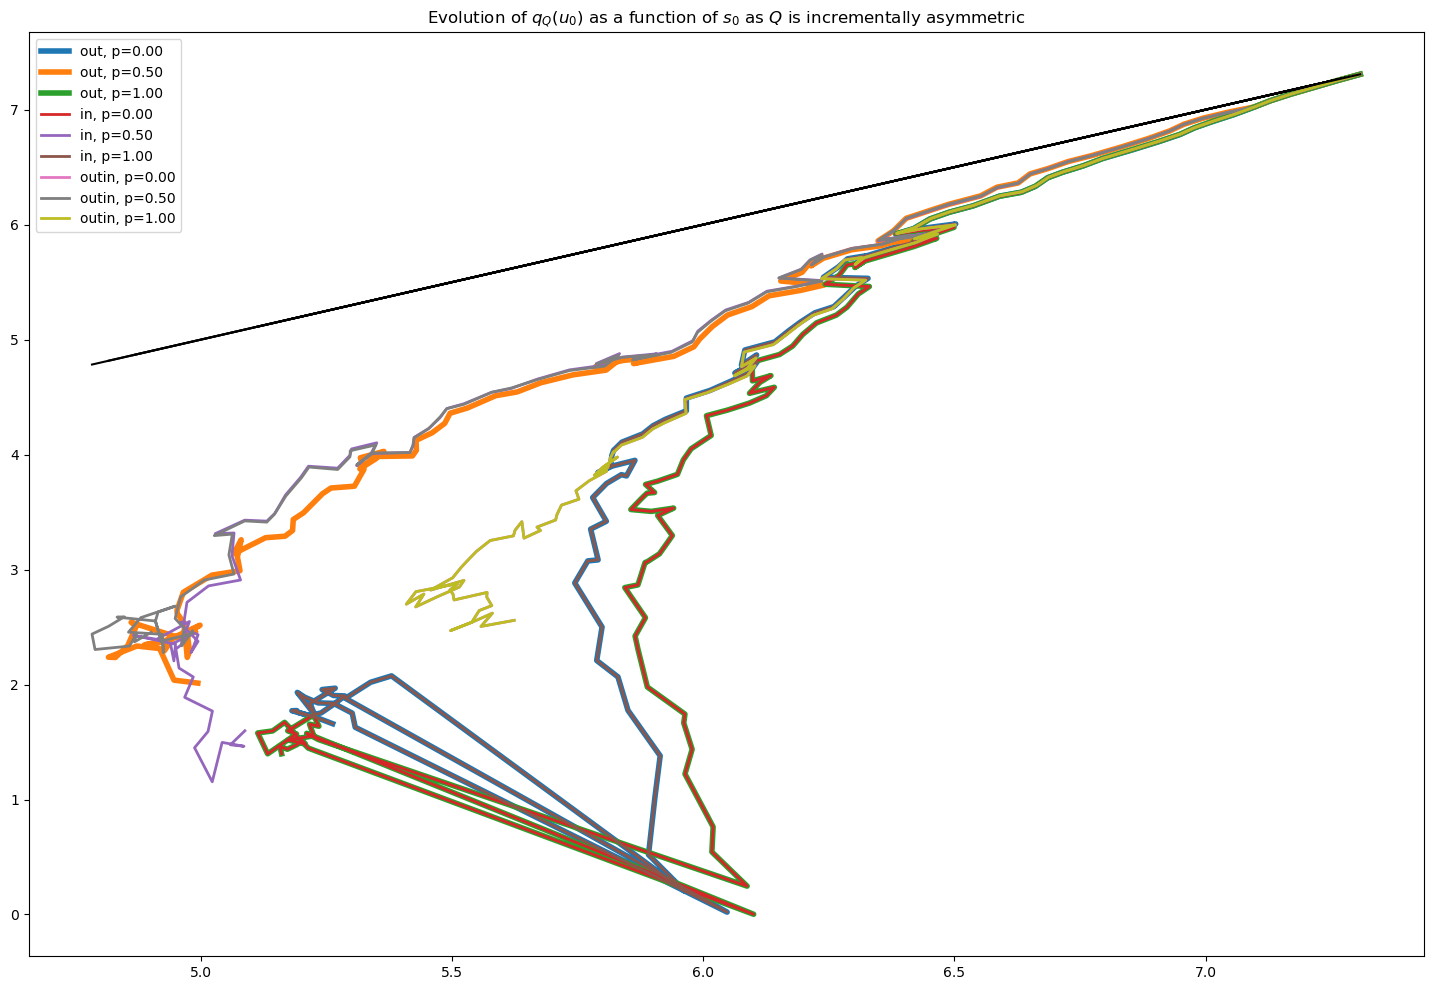

In [4]:
importlib.reload(dgsp)

randir = rand.copy()

initial_seed = 220367

p_s = np.linspace(0, 1, 3)
p_s = [0, 0.5, 1]

#fig, ax_list = plt.subplots(ncols=len(p_s), figsize=(18, 6))
_, ax_solo = plt.subplots(figsize=(18, 12))

null_model = "outin"

for null in ["out", "in", "outin"]:
    #for p, axes in zip(p_s, ax_list):
    for p in p_s:

        (
            u_list,
            v_list,
            s_list,
            q_list,
            dir_id_list,
            adj_list,
            ) = dgsp.incremental_directed_SVD(randir,
                                              null_model=null,
                                              initial_seed=initial_seed,
                                              fix_negative=True,
                                              sort_by_q=False,
                                              p=p,
                                              store_adjacency=True)

        lw = 2
        if null == "out":
            lw = 4

        #axes.set_title(f"null: {null} $p={p:1.2f}$")
        #axes.scatter(s_list[:, 0], q_list[:, 0], s=100, c=np.arange(len(s_list)), cmap="plasma")#, alpha=.7, lw=0)
        ax_solo.plot(s_list[:, 0], q_list[:, 0], lw=lw, label=f"{null}, p={p:1.2f}")
        #axes.set_xlabel("Singular value $s_0$")
        #axes.set_ylabel("Modularity index $q_Q(u_0)=q_Q(v_0)$")
        #axes.plot([s_list[:, 0].min(), s_list[:, 0].max()], [s_list[:, 0].min(), s_list[:, 0].max()], "k--", alpha=.5)
        ax_solo.plot([s_list[:, 0].min(), s_list[:, 0].max()], [s_list[:, 0].min(), s_list[:, 0].max()], "k-")
    
ax_solo.set_title("Evolution of $q_Q(u_0)$ as a function of $s_0$ as $Q$ is incrementally asymmetric")
ax_solo.legend()

#fig, axes = plt.subplots(2, 2, figsize=(18, 6))
#axes[0, 0].imshow(u_list[:, :, 0].T, vmin=-1, vmax=1, cmap="coolwarm")
#axes[0, 0].set_title("$u_i$ as a function of directedness (x axis)")
#axes[1, 0].imshow(v_list[:, 0].T, vmin=-1, vmax=1, cmap="coolwarm")
#axes[1, 0].set_title("$v_i$ as a function of directedness (x axis)")
#
#
#ut_U = np.array([ u[:, 0] @ u for u in u_list])
#ut_U = np.matmul(u_list[..., 0].reshape((len(u_list), 1, -1)), u_list).reshape((len(u_list), -1))
#V_u = np.matmul(v_list, u_list[..., :1]).reshape((len(u_list), -1))
#
#axes[0, 1].imshow(ut_U.T, vmin=-1, vmax=1, cmap="coolwarm")
#axes[0, 1].set_title("$u_iU$ as a function of directedness (x axis)")
#axes[1, 1].imshow(V_u.T, vmin=-1, vmax=1, cmap="coolwarm")
#axes[1, 1].set_title("$V^Tu_i$ as a function of directedness (x axis)")

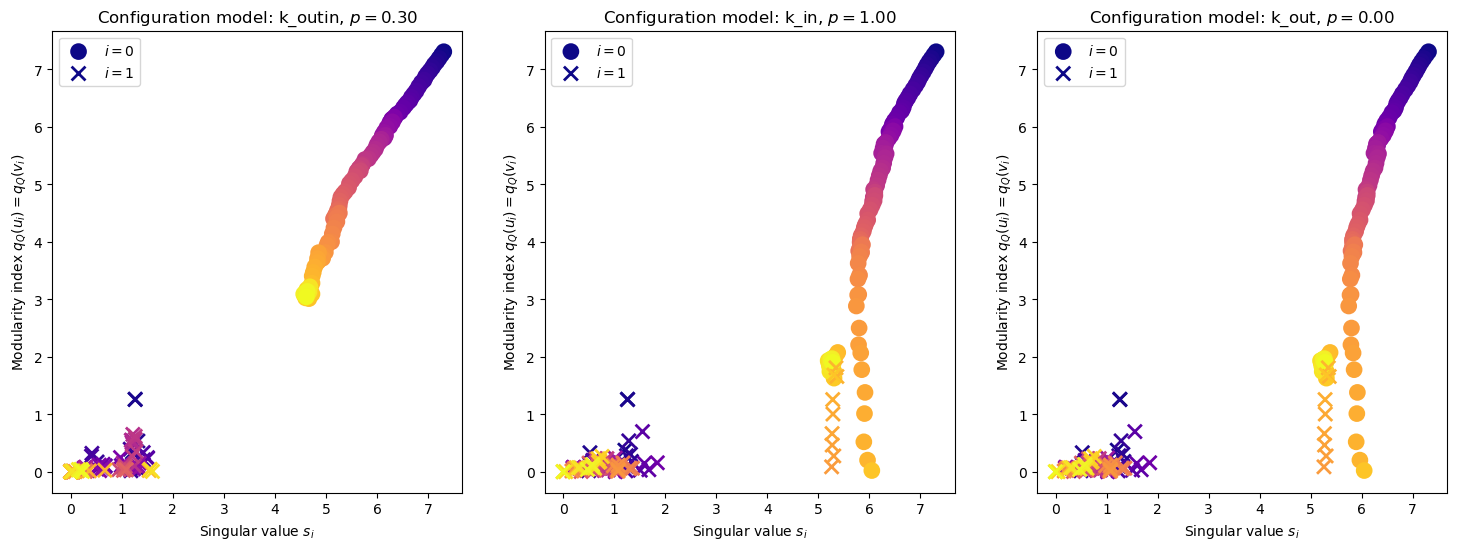

In [5]:
_, axes = plt.subplots(ncols=3, figsize=(18, 6))

for null, p, ax_solo in zip(["outin", "in", "out"], [0.3, 1, 0], axes):

    (
        u_list,
        v_list,
        s_list,
        q_list,
        dir_id_list,
        adj_list,
        ) = dgsp.incremental_directed_SVD(randir,
                                        null_model=null,
                                        initial_seed=initial_seed,
                                        fix_negative=True,
                                        p=p,
                                        store_adjacency=True)

    sub_min = 0
    sub_max = 100
    
    ax_solo.set_title(f"Configuration model: k_{null}, $p={p:1.2f}$")

    for rec_id, mark in enumerate(["o", "x"]):
        ax_solo.scatter(s_list[sub_min:sub_max, rec_id],
                        q_list[sub_min:sub_max, rec_id],
                        lw=lw, label=f"$i={rec_id}$",
                        s=100, c=np.arange(len(s_list[sub_min:sub_max])),
                        cmap="plasma", marker=mark)

    #ax_solo.plot([s_list[:, 0].min(), s_list[:, 0].max()], [s_list[:, 0].min(), s_list[:, 0].max()], "k-")
    ax_solo.set_xlabel("Singular value $s_i$")
    ax_solo.set_ylabel("Modularity index $q_Q(u_i)=q_Q(v_i)$")
    ax_solo.legend()

In [12]:
null = "outin"
p=0
(
        u_list,
        v_list,
        s_list,
        q_list,
        dir_id_list,
        adj_list,
        ) = dgsp.incremental_directed_SVD(randir,
                                          null_model=null,
                                          initial_seed=initial_seed,
                                          fix_negative=True,
                                          p=p,
                                          sort_by_q=True,
                                          store_adjacency=True)

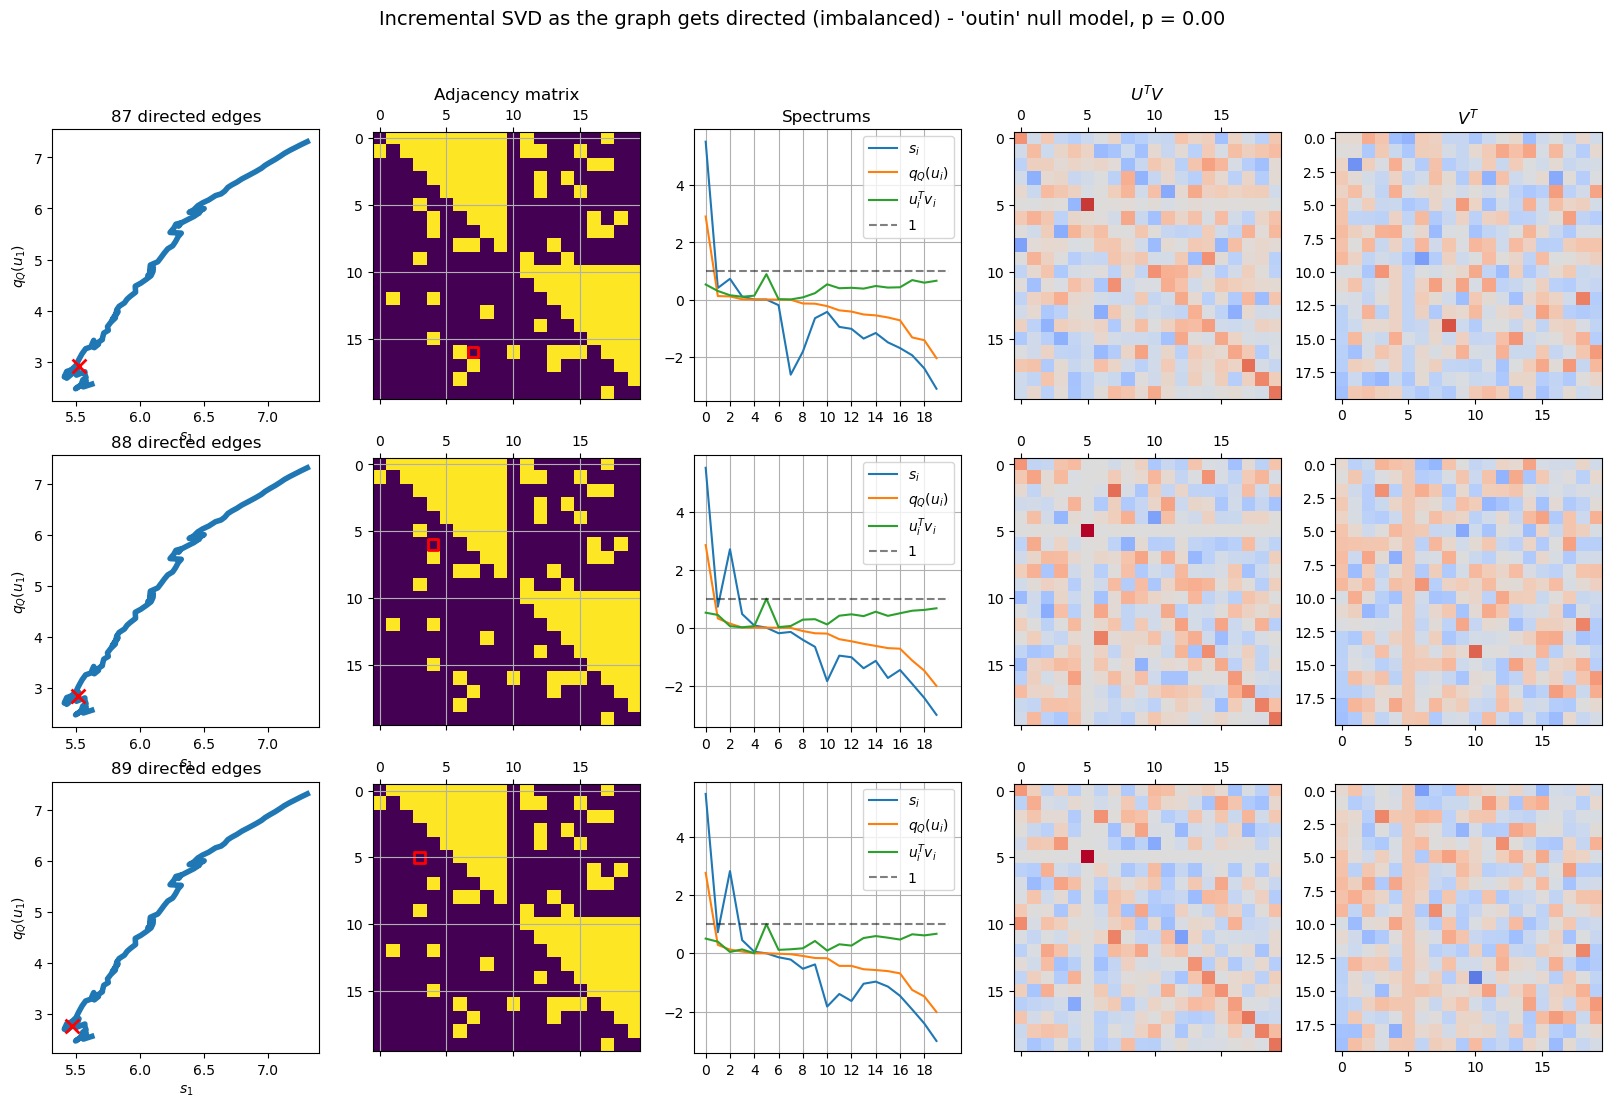

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

fig.suptitle(f"Incremental SVD as the graph gets directed (imbalanced) - '{null}' null model, p = {p:1.2f}", fontsize=14)

# 89
id_to_check = 89

axes[0, 1].set_title("Adjacency matrix")
axes[0, 2].set_title("Spectrums")
axes[0, 3].set_title("$U^TV$")
#axes[0, 3].set_title("$U$")
axes[0, 4].set_title("$V^T$")
#axes[0, 3].set_title("Modularity index $q_Q(u_i)$")

for i, ax in enumerate(axes):
    id = id_to_check+i-2
    ax[0].plot(s_list[:, 0], q_list[:, 0], lw=4, zorder=0)
    ax[0].set_title(f"{id} directed edges")
    ax[0].set_xlabel(f"$s_1$")
    ax[0].set_ylabel(f"$q_Q(u_1)$")
    ax[0].scatter(s_list[id, 0], q_list[id, 0], s=100, lw=2, marker="x", c="r")

    ax[1].matshow(adj_list[id-1])
    ax[1].scatter(dir_id_list[id-1][0], dir_id_list[id-1][1], c="none", s=60, lw=2, marker="s", edgecolor="r")
    ax[1].grid()

    ax[2].plot(s_list[id], label="$s_i$")
    ax[2].plot(q_list[id], label="$q_Q(u_i)$")
    ax[2].plot(np.diag(u_list[id].T @ v_list[id].T), label="$u_i^Tv_i$")
    ax[2].plot([0, len(s_list[id])], [1]*2, "k--", alpha=.5, label="1")
    ax[2].legend()
    ax[2].set_xticks(np.arange(0, len(s_list[id]), 2))
    ax[2].grid()

    svect_vmax = 1
    ax[3].matshow(u_list[id].T @ v_list[id].T, cmap="coolwarm", vmin=-svect_vmax, vmax=svect_vmax)

    #ax[3].imshow(u_list[id], cmap="coolwarm", vmin=-svect_vmax, vmax=svect_vmax)
    ax[4].imshow(v_list[id].T, cmap="coolwarm", vmin=-svect_vmax, vmax=svect_vmax)

    #nx.draw(nx.DiGraph(adj_list[id-1][:5][:, :5]), ax=ax[3], pos=nx.circular_layout(nx.DiGraph(adj_list[id-1])), with_labels=True)
    #my_test = adj_list.copy()[id-1]#[:10][:, :10]
    #my_test[np.tril_indices_from(my_test)] = 0
    #nx.draw(nx.DiGraph(my_test), ax=ax[4], with_labels=True)
    #nx.draw_circular(nx.DiGraph(adj_list[id-1][:10][:, :10]), ax=ax[3], with_labels=True)
    #dgsp_plot.plot_graph(adj_list[id-1][:5][:, :5], position="spring")

Text(0, 0.5, '$i$')

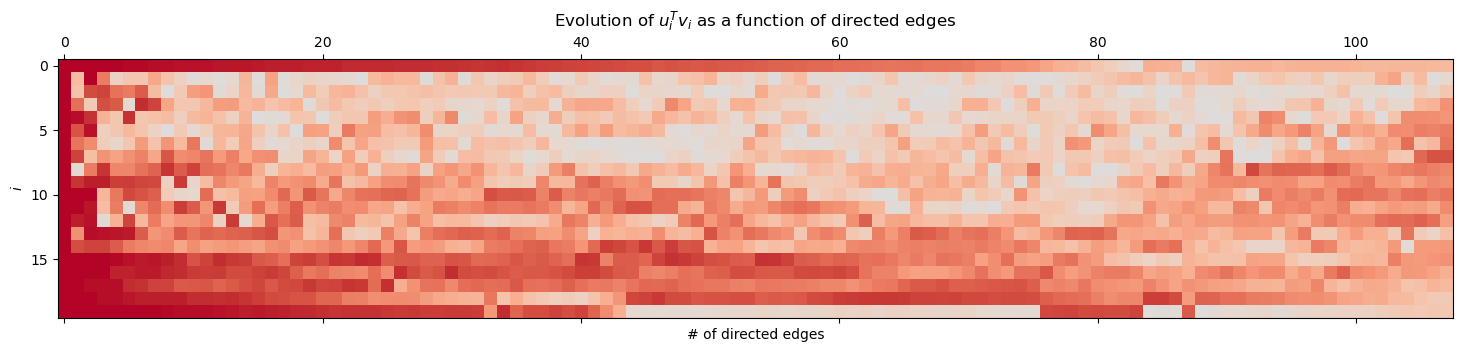

In [8]:
ut_v_list = np.array([np.diag(u_list[id].T @ v_list[id].T) for id, _ in enumerate(u_list)])

_, ax = plt.subplots(figsize=(18, 6))
ax.matshow(ut_v_list.T, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title("Evolution of $u_i^Tv_i$ as a function of directed edges")
ax.set_xlabel("# of directed edges")
ax.set_ylabel("$i$")

## Sort SVD by $Q$

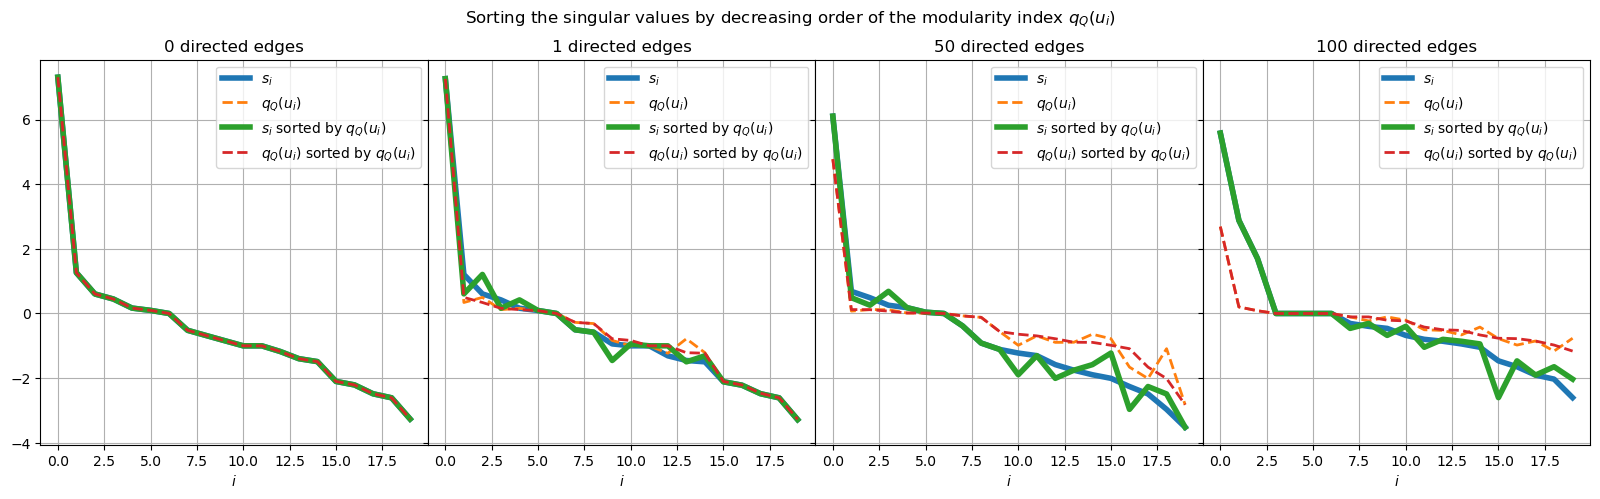

In [71]:
null = "outin"
p=1

spectrum_ids = [0, 1, 50, 100]
#spectrum_ids = np.linspace(0, len(u_list)-1, 5, dtype=int)
fig, axes = plt.subplots(nrows=1, ncols=len(spectrum_ids), figsize=(20, 5), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)
fig.suptitle("Sorting the singular values by decreasing order of the modularity index $q_Q(u_i)$")

for sortbyq in [False, True]:
    (
            u_list,
            v_list,
            s_list,
            q_list,
            dir_id_list,
            adj_list,
            ) = dgsp.incremental_directed_SVD(randir,
                                            null_model=null,
                                            initial_seed=initial_seed,
                                            fix_negative=True,
                                            sort_by_q=sortbyq,
                                            p=p,
                                            store_adjacency=True)
    

    for id, ax in zip(spectrum_ids, axes):
        ax.plot(s_list[id], lw=4, label="$s_i$" + " sorted by $q_Q(u_i)$"*(sortbyq))
        ax.plot(q_list[id], "--", lw=2, label="$q_Q(u_i)$" + " sorted by $q_Q(u_i)$"*(sortbyq))

for id, ax in zip(spectrum_ids, axes):
    ax.set_title(f"{id} directed edges")
    ax.set_xlabel("$i$")
    ax.grid()
    ax.legend()

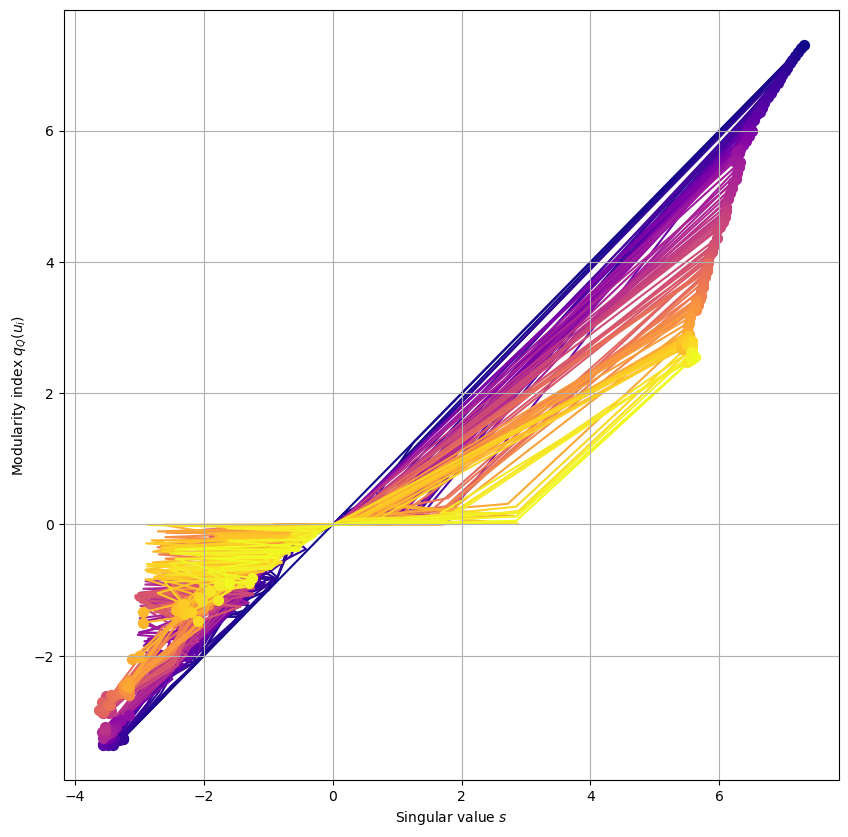

In [72]:
z_pos = np.arange(len(s_list))

subset = 1000

colors = plt.colormaps.get_cmap("plasma")(np.linspace(0, 1, min([len(s_list), subset])))

fig, ax = plt.subplots(figsize=(10, 10))
#ax3d = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
for z_i, (s, q) in enumerate(zip(s_list[:subset], q_list[:subset])):
#    #ax.scatter(s, q, zs=z_i, zdir="z", marker="o", s=50, c=np.arange(len(s)),  cmap="plasma")
    #ax3d.plot(s, q, "o-", zs=z_i, zdir="z", c=colors[z_i])
    ax.plot(s, q, c=colors[z_i], zorder=0)
    ax.scatter([s[0], s[-1]], [q[0], q[-1]], s=50, color=colors[z_i])
#ax3d.set_xlabel("Singular value $s$")
#ax3d.set_ylabel("Modularity index $q_Q(u_i)$")
#ax3d.set_zlabel('directedness')
#ax3d.view_init(elev=90, azim=-90, roll=0)

ax.set_xlabel("Singular value $s$")
ax.set_ylabel("Modularity index $q_Q(u_i)$")
ax.grid()

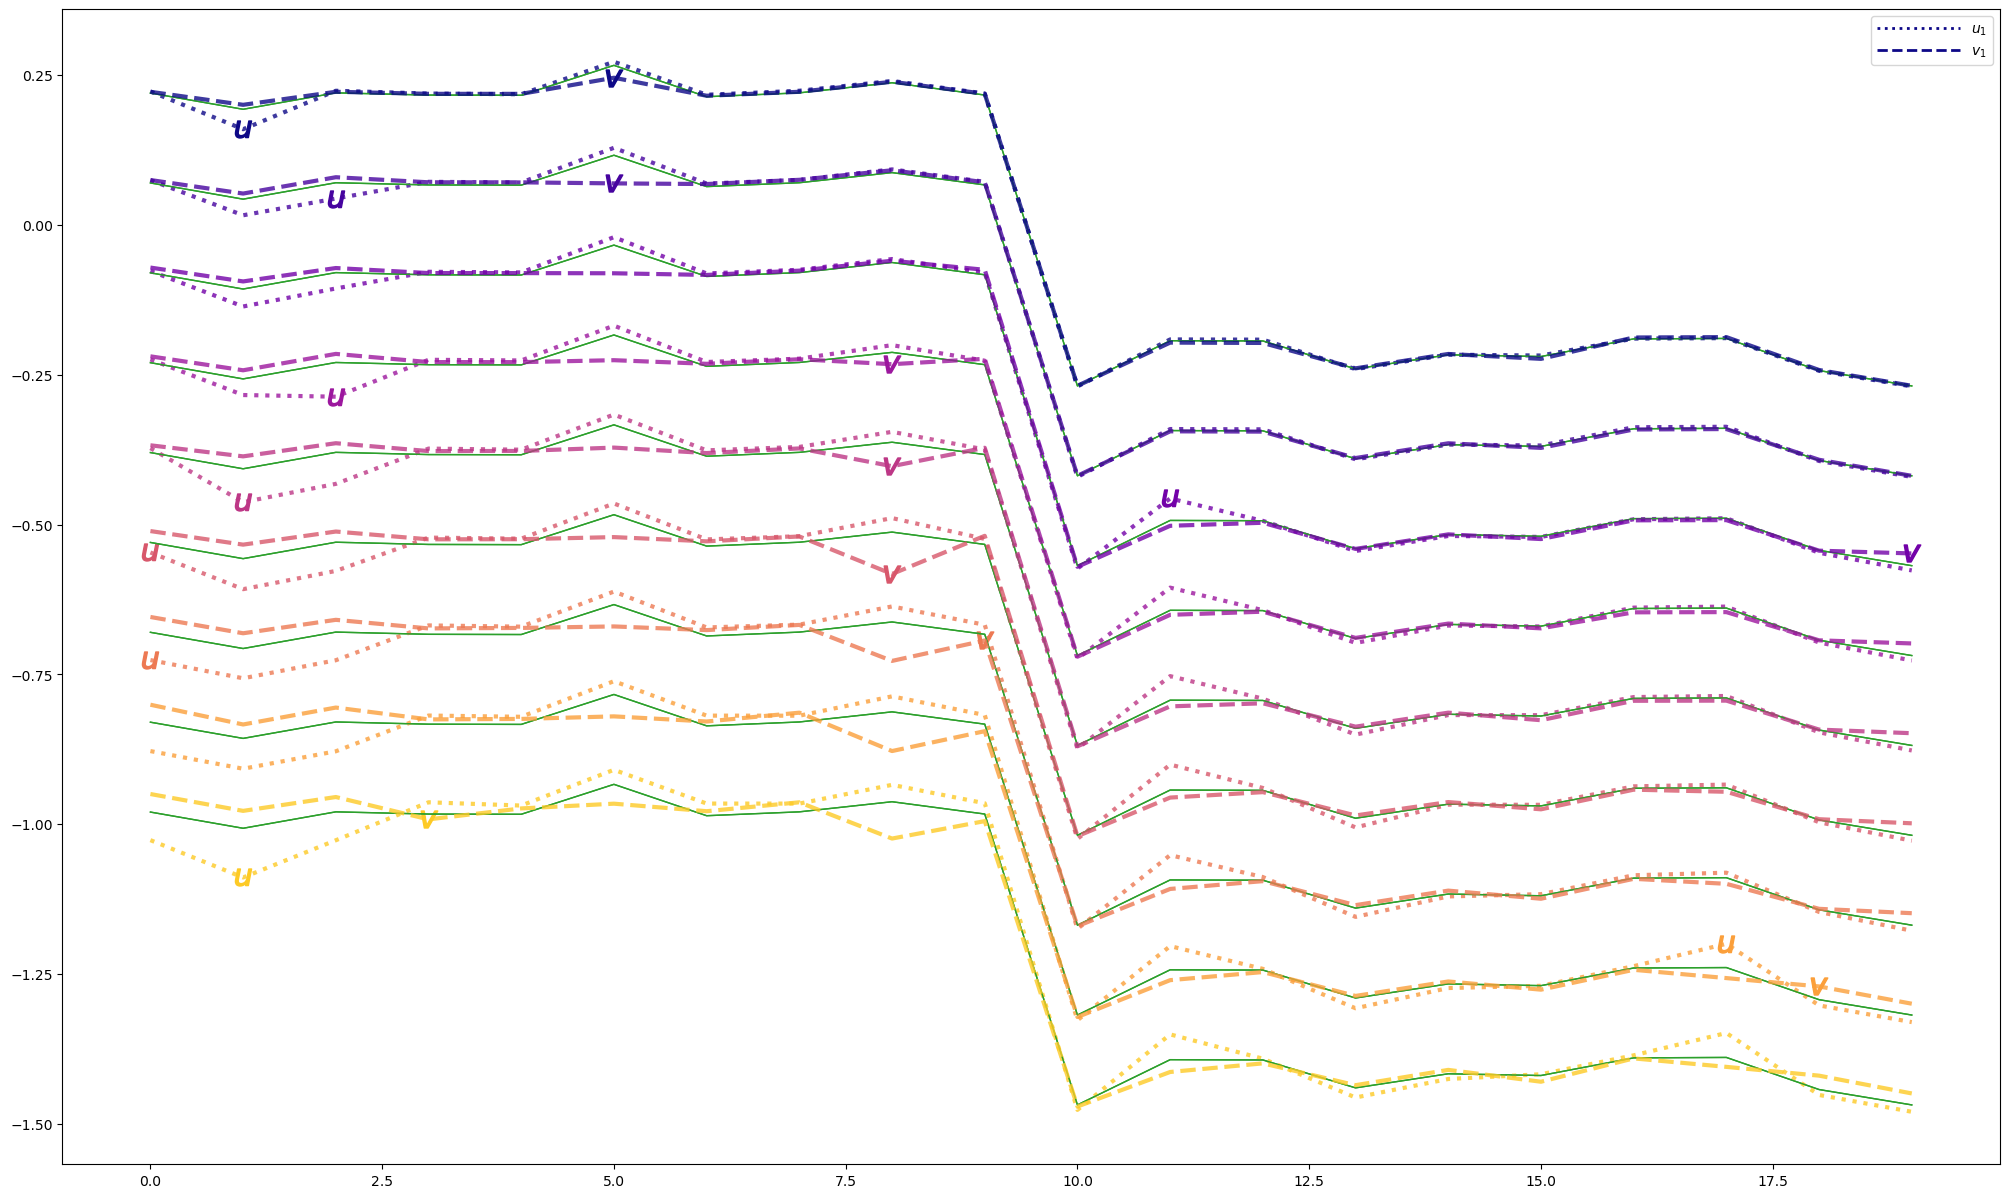

In [77]:
importlib.reload(dgsp_plot)

dgsp_plot.plot_svect_evolution(u_list, v_list, dir_id_list, n_subset=10)

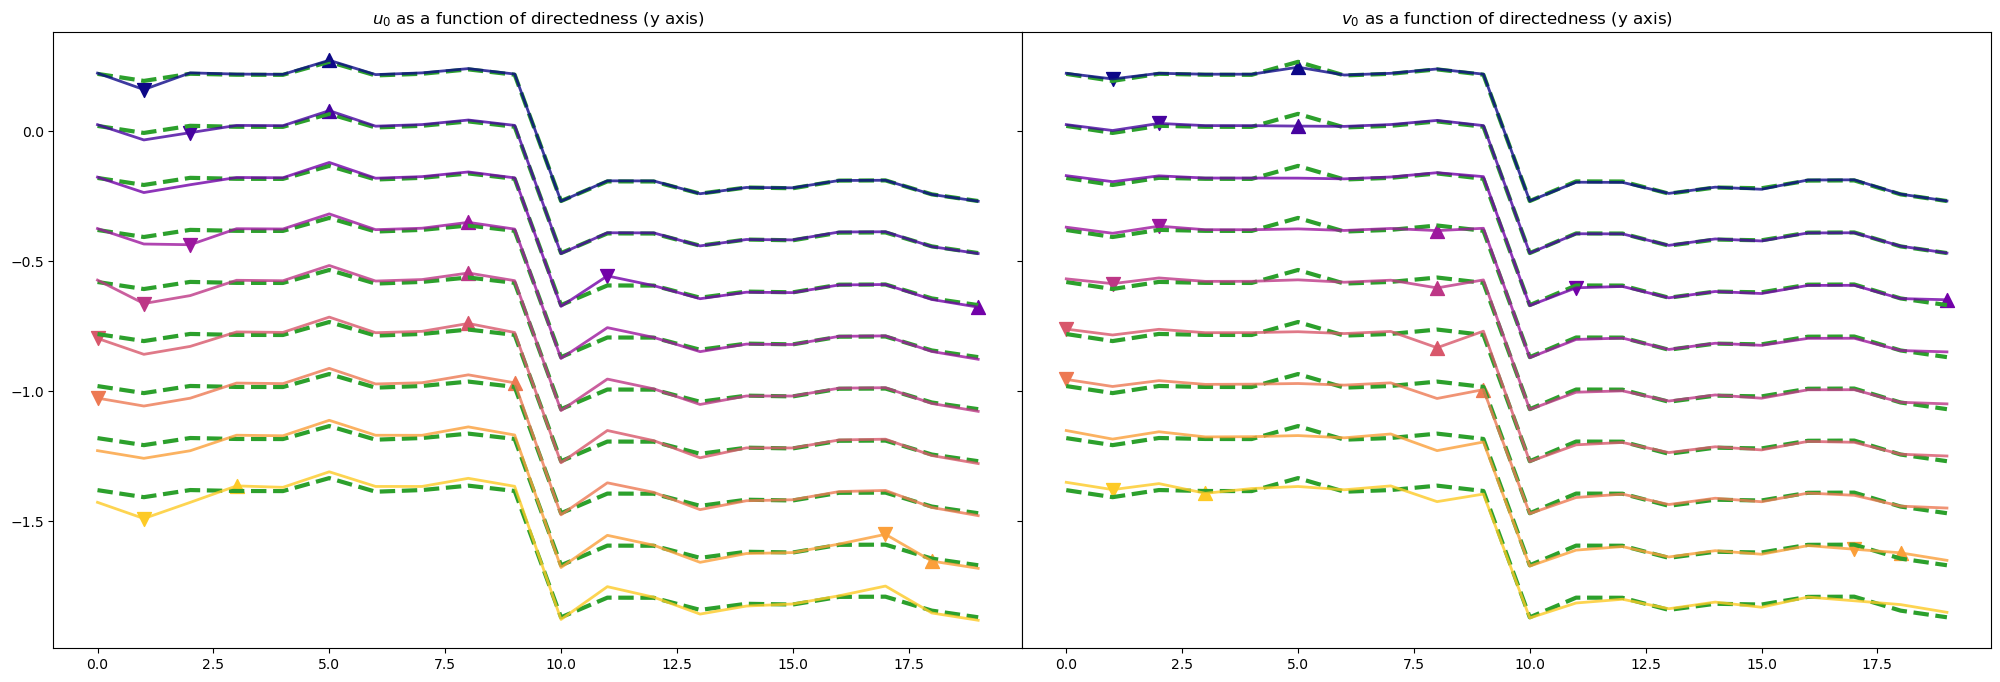

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.subplots_adjust(wspace=0)

n_subset = 10
lowest_sub = min([n_subset, len(u_list)])

axes[0].set_title("$u_0$ as a function of directedness (y axis)")
axes[1].set_title("$v_0$ as a function of directedness (y axis)")

line_styles = [":", "--"]
line_labels = ["$u_1$", "$v_1$"]
scatter_mark = ["$u$", "$v$"]

for vec_id, (ax, vect) in enumerate(zip(axes, [u_list, np.moveaxis(v_list, 1, 2)])):
    colors = plt.colormaps["plasma"](np.linspace(0, 1, lowest_sub))

    offset=0.2
    #offset=0

    for i, u in enumerate(vect[1:lowest_sub, :, 0]):
        if offset>0:
            ax.plot(vect[0, :, 0]-i*offset, "--", lw=3, c="tab:green")
            
        ax.plot(u-i*offset, lw=2, c=colors[i], alpha=.8)
        ax.scatter(dir_id_list[i][0, 0], u[dir_id_list[i][0, 0]]-i*offset, s=100, marker="v", color=colors[i])
        ax.scatter(dir_id_list[i][1, 0], u[dir_id_list[i][1, 0]]-i*offset, s=100, marker="^", color=colors[i])


(108, 20, 20)
(108, 20, 20)


Text(0.5, 1.0, 'First right singular vector')

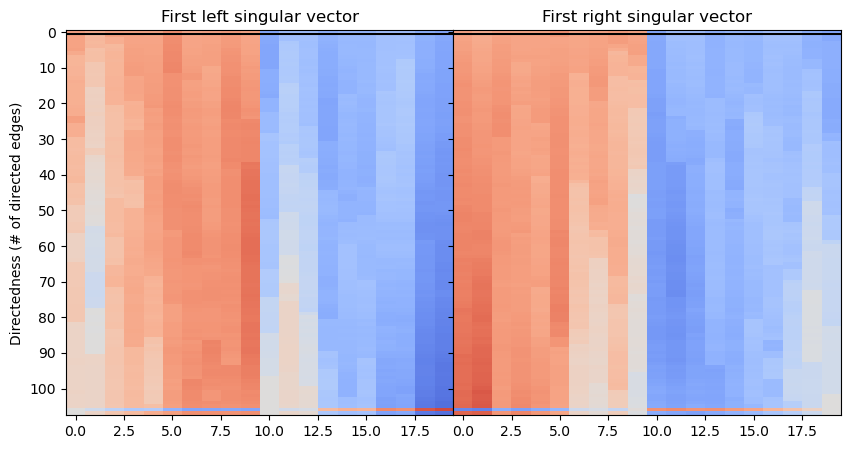

In [75]:
maxval=.5

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(wspace=0)

fix_sign = np.sign(u_list[:, 0, 0])
fix_sign[fix_sign == 0] = -1

for ax, vect in zip(axes, [u_list, np.moveaxis(v_list, 1, 2)]):
    fix_broadcast = np.array([fix_sign]*vect.shape[1]).T
    print(vect.shape)
    ax.imshow(fix_broadcast*np.array(vect[:, :, 0]), cmap="coolwarm", aspect="auto", vmin=-maxval, vmax=maxval, interpolation="none")
    ax.plot([-.5, n_nodes-.5], [.5]*2, c="k")

axes[0].set_title("First left singular vector")
axes[0].set_ylabel("Directedness (# of directed edges)")
axes[0].set_yticks(np.arange(0, len(u_list), 10))
axes[1].set_title("First right singular vector")

# Analysis of imbalance (breaking the symmetry)

(<Figure size 2000x800 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

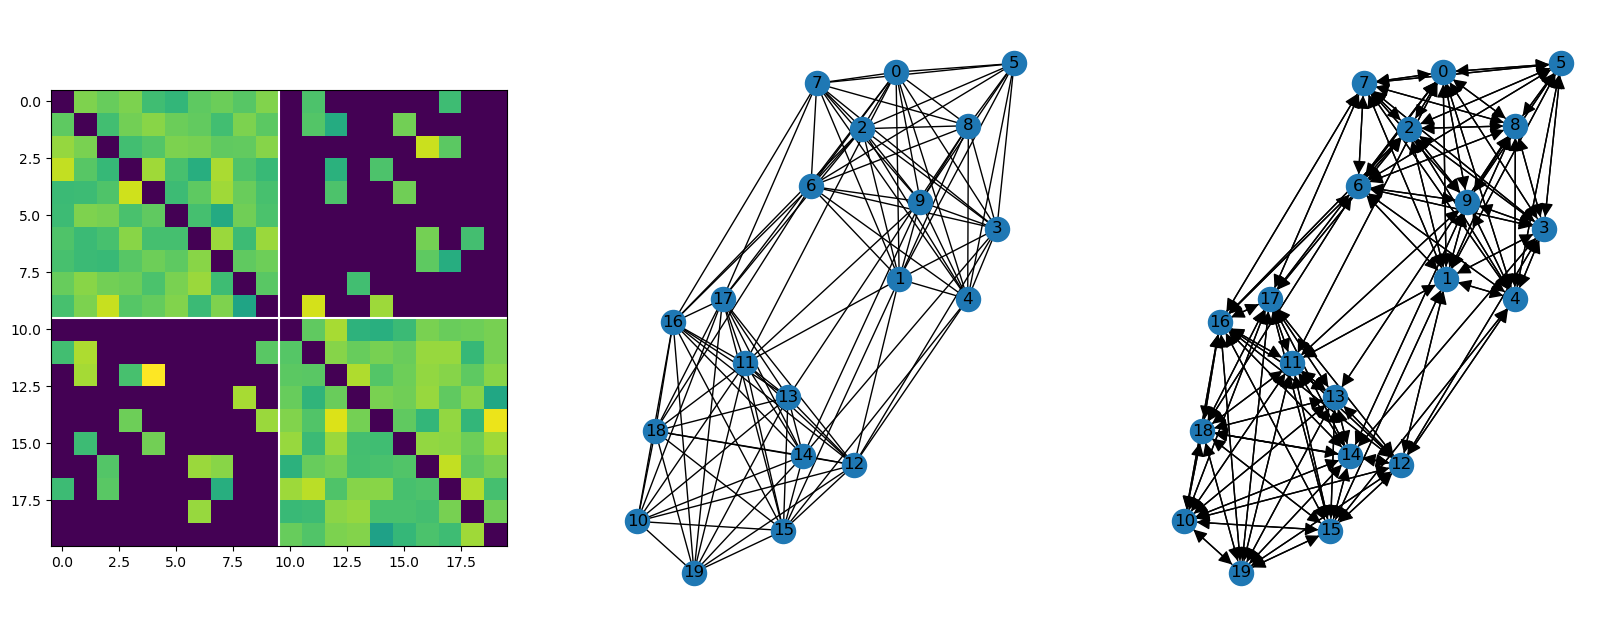

In [15]:
importlib.reload(dgsp)

sigma = 0.1

np.random.seed(myseed)

rand_imbalance = dgsp.random_imbalance(randir, sigma=sigma)

dgsp_plot.plot_graph(rand_imbalance, position="spring")

### Random noise

Text(0, 0.5, 'Diff with undirected spectrum')

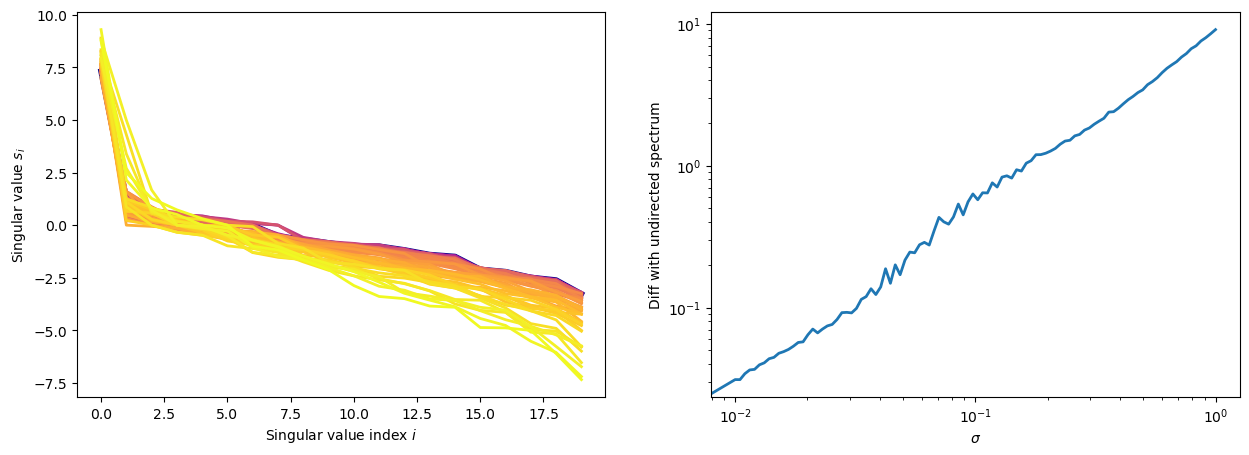

In [16]:
sigmas = [0, 0.01, 0.05, 0.1, 0.5, 1]

sigmas = [0] + np.logspace(-2, 0, 100).tolist()

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

colors = plt.cm.plasma(np.linspace(0, 1, len(sigmas)))

_, S_0, _ = dgsp.sorted_SVD(dgsp.modularity_matrix(randir), fix_negative=True)

n_trials = 100
mse = np.zeros((n_trials, len(sigmas)))
for trial in range(n_trials):
    for sigma_i, sigma in enumerate(sigmas):

        rand_imbalance = dgsp.random_imbalance(randir, sigma=sigma)
        U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(rand_imbalance), fix_negative=True)

        if trial == 0:
            lw = 2
            if sigma == 0:
                lw = 4
            axes[0].plot(S, lw=lw, label=f"$\sigma={sigma}$", c=colors[sigmas.index(sigma)])

        #mse.append(np.linalg.norm(S-S_0))
        mse[trial, sigma_i]=np.linalg.norm(S-S_0)

#axes[1].plot(sigmas, mse, lw=2, label=f"$\sigma={sigma}$")
axes[1].loglog(sigmas, mse.mean(axis=0), lw=2, label=f"$\sigma={sigma}$")

axes[0].set_xlabel("Singular value index $i$")
axes[0].set_ylabel("Singular value $s_i$")
#axes[0].legend()

#axes[1].set_xticks(np.arange(len(sigmas)), labels=sigmas)
axes[1].set_xlabel("$\sigma$")
axes[1].set_ylabel("Diff with undirected spectrum")

### Selecting one single edge

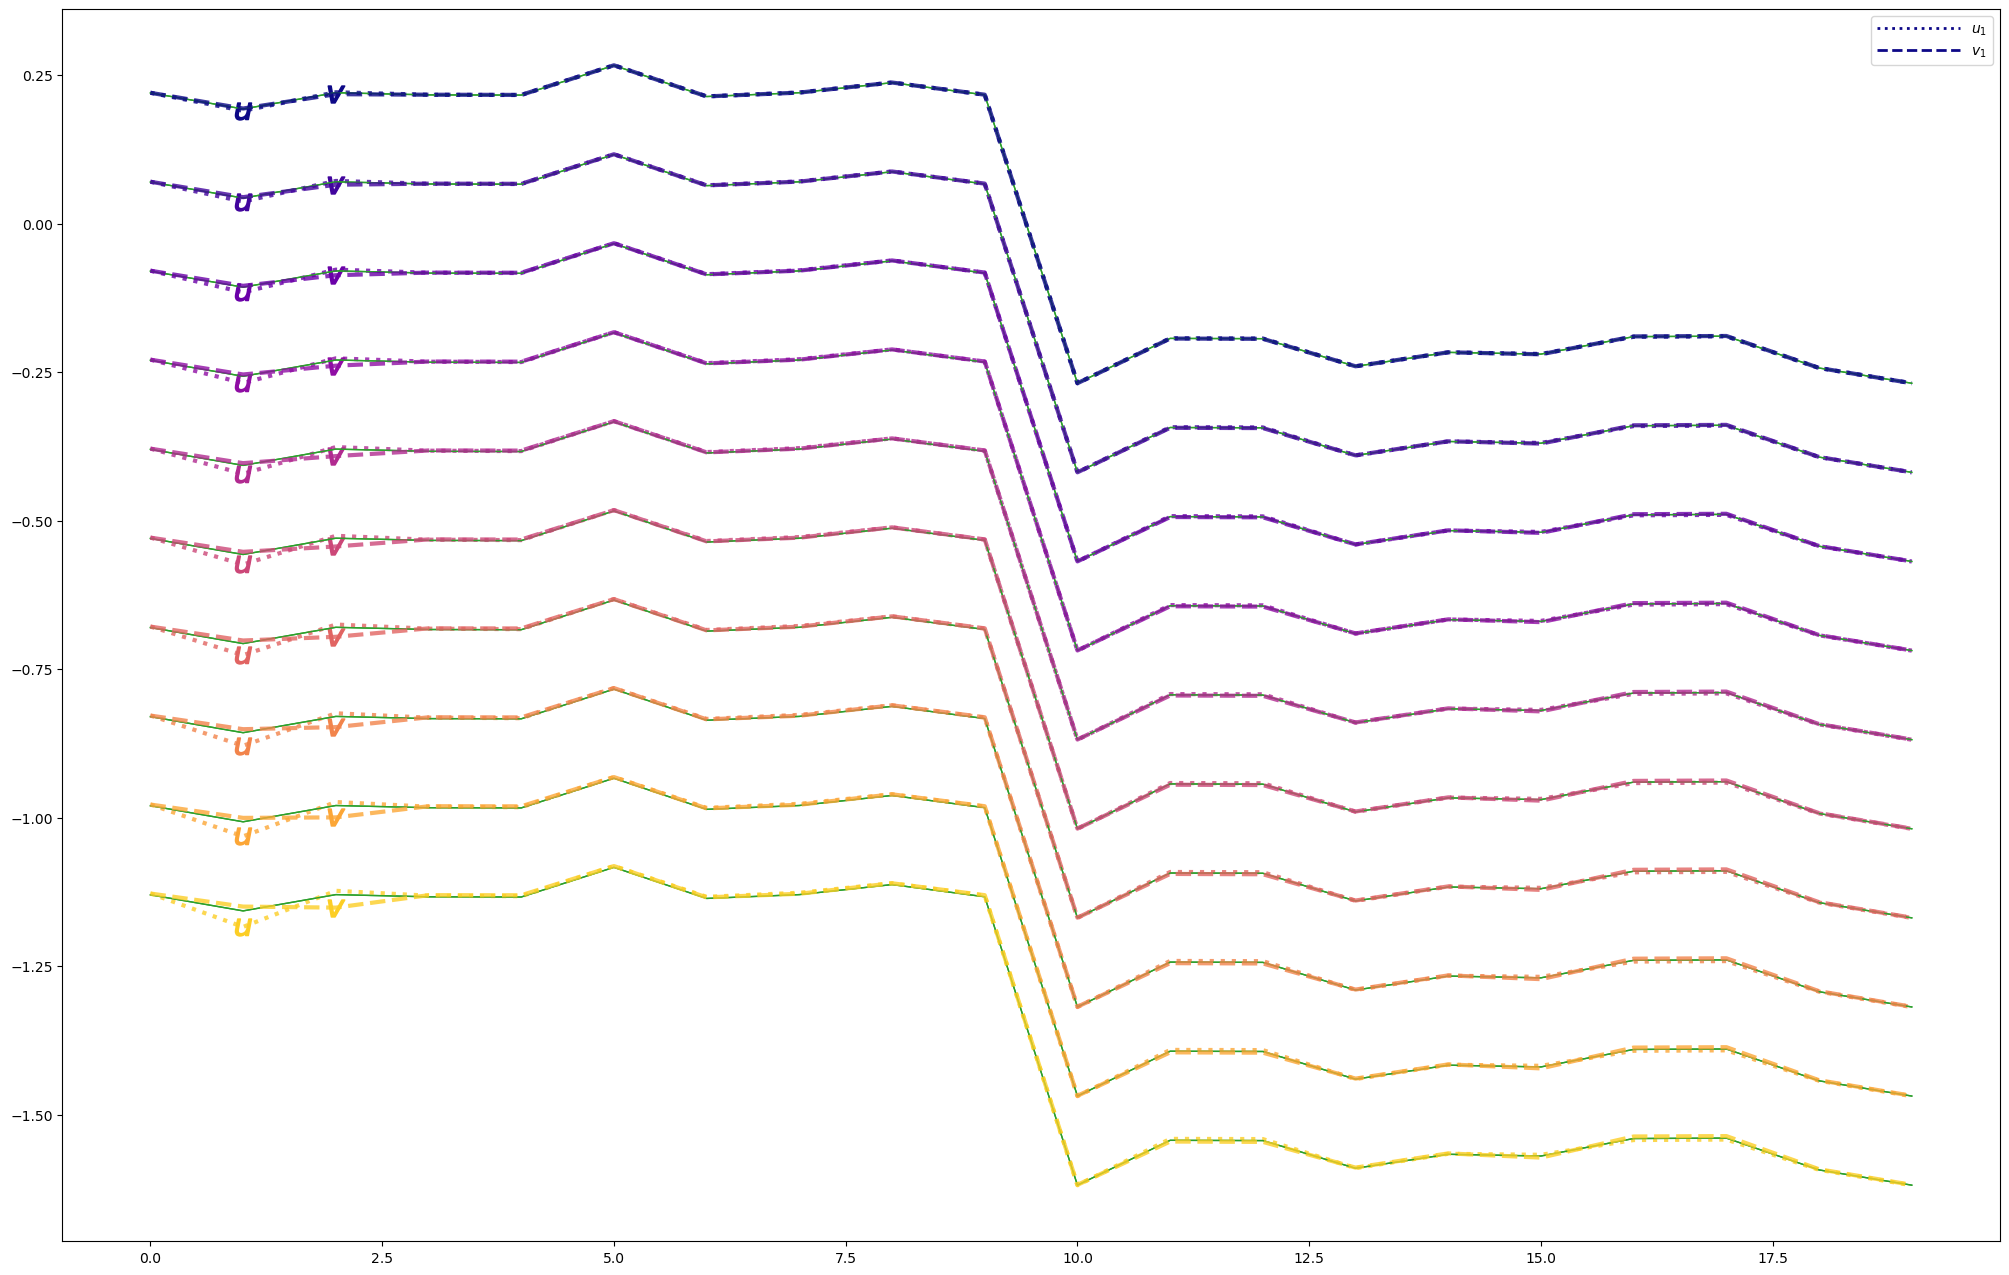

In [17]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

np.random.seed(220367)

sigma = .1

s_list = []
q_list = []
u_list = []
v_list = []

chosen = None
rand_imbalance = randir.copy()
while chosen is None or rand_imbalance[*chosen] > 0:

    U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(rand_imbalance), fix_negative=True)

    u_list.append(U)
    v_list.append(Vh)
    s_list.append(S)
    q_list.append([dgsp.modularity_quadratic(mod_mat, U[:, i]) for i, _ in enumerate(S)])
    
    rand_imbalance, chosen = dgsp.random_edge_decrease(rand_imbalance, sigma=sigma, chosen=chosen)

u_list = np.array(u_list)
v_list = np.array(v_list)
s_list = np.array(s_list)
q_list = np.array(q_list)
dir_list = [np.atleast_2d(chosen).T]*len(u_list)

dgsp_plot.plot_svect_evolution(u_list, v_list, dir_edge_list=dir_list, n_subset=100)
#dgsp_plot.plot_svect_evolution_stem(u_list, v_list, dir_edge_list=dir_list, n_subset=100, offset=.05)

#fig, axes = plt.subplots(figsize=(15, 6))
#axes.plot([0, 20], [0]*2, "k")
#axes.scatter(np.arange(u_list.shape[-1]), u_list[0, :, 0].T - u_list[1, :, 0].T, marker="o", s=100, label="$u_0$")
#axes.scatter(np.arange(u_list.shape[-1]), v_list[0, 0, :].T - v_list[1, 0, :].T, marker="s", s=100, label="$v_0$")
#
#rand_imbalance, chosen = dgsp.random_edge_decrease(randir, sigma=sigma, chosen=chosen)
#
#scale = 0.004
#axes.scatter(np.arange(u_list.shape[-1]), -rand_imbalance[chosen[0]]*scale, marker="o", alpha=.6, edgecolors="none", label="$a_0j$")
#axes.scatter(np.arange(u_list.shape[-1]), -rand_imbalance[chosen[1]]*scale, marker="s", alpha=.6, edgecolors="none", label="$a_i1$")

#axes.legend(ncols=2)

[1 2]


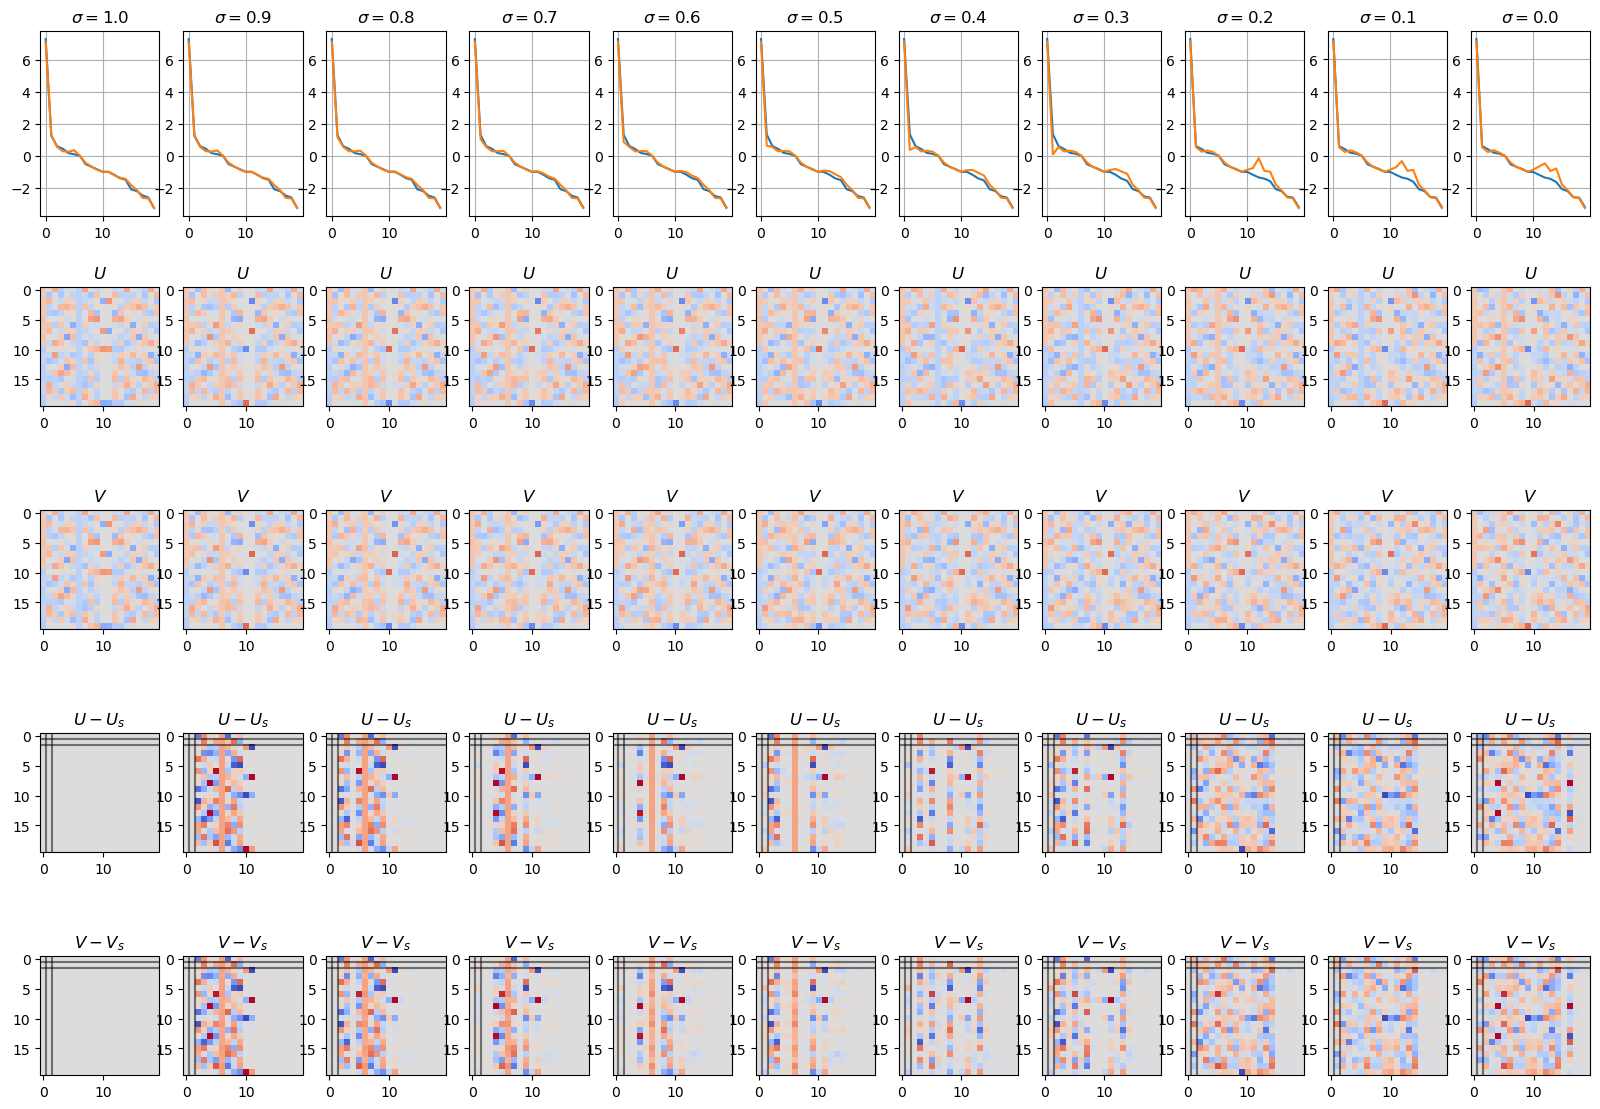

In [18]:
ids_to_check = np.arange(len(u_list))

fig, axes = plt.subplots(nrows=5, ncols=len(ids_to_check), figsize=(20, 14))

print(chosen)

vmaxsvect=1

for id, ax in zip(ids_to_check, axes.T):
    ax[0].set_title(f"$\sigma={1-id*sigma:1.1f}$")
    ax[0].plot(s_list[id], label="$s_i$")
    ax[0].plot(q_list[id], label="$q_i$")
    ax[0].grid()

    ax[1+0].imshow(u_list[id], cmap="coolwarm", vmin=-vmaxsvect, vmax=vmaxsvect)
    ax[1+0].set_title(f"$U$")

    ax[1+1].imshow(v_list[id].T, cmap="coolwarm", vmin=-vmaxsvect, vmax=vmaxsvect)
    ax[1+1].set_title(f"$V$")

    ax[1+2].imshow(u_list[id]-u_list[0], cmap="coolwarm", vmin=-vmaxsvect, vmax=vmaxsvect)
    for i in chosen:
        ax[1+2].plot([0-.5, 20-.5], [i-.5]*2, "k", alpha=.5)
        ax[1+2].plot([i-.5]*2, [0-.5, 20-.5], "k", alpha=.5)
    ax[1+2].set_title(f"$U - U_s$")

    ax[1+3].imshow((v_list[id]-v_list[0]).T, cmap="coolwarm", vmin=-vmaxsvect, vmax=vmaxsvect)
    for i in chosen:
        ax[1+3].plot([0-.5, 20-.5], [i-.5]*2, "k", alpha=.5)
        ax[1+3].plot([i-.5]*2, [0-.5, 20-.5], "k", alpha=.5)
    ax[1+3].set_title(f"$V - V_s$")